<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/airways_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# R code

In [30]:
install.packages("vcd")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
# prompt: write r code to read a csv file

# Install and load the readr package if not already installed
if(!require(readr)){install.packages("readr")}
library(readr)

# Replace 'your_file.csv' with the actual file path
df <- read_csv("https://raw.githubusercontent.com/harnalashok/classification/refs/heads/main/data/airways_mod_ver4.csv")

# Print the first few rows of the data frame to verify
head(df)

Rows: 1000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): sex
dbl (12): age, height, subluxation of mandible, head and neck movement, buck...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,male,172,1,0,1,0,22.40,17.0,8.6,2,0,2
55,female,143,1,0,1,0,27.45,16.0,7.8,2,0,1
59,male,162,2,1,0,1,24.20,14.3,6.9,3,0,3
48,female,168,1,0,0,0,28.50,15.6,7.2,3,0,2
51,female,154,3,0,0,1,25.30,14.3,6.7,4,1,4
56,male,182,1,1,1,0,30.00,20.0,9.7,2,0,3


In [15]:
colnames(df)


[1] "age"                     "sex"                    
 [3] "height"                  "subluxation of mandible"
 [5] "head and neck movement"  "buck teeth"             
 [7] "edentulous"              "bmi"                    
 [9] "sternomental distance"   "thyromental distance"   
[11] "mallampatti"             "mouth opening"          
[13] "cormack lahane"

In [21]:
# prompt: write code to change column names in df

colnames(df) <- c("age", "sex", "height", "subluxation_of_mandible", "head_and_neck_movement",
                  "buck_teeth", "edentulous", "bmi", "sternomental_distance",
                  "thyromental_distance", "mallampatti", "mouth_opening", "cormack_lahane")
head(df)


age,sex,height,subluxation_of_mandible,head_and_neck_movement,buck_teeth,edentulous,bmi,sternomental_distance,thyromental_distance,mallampatti,mouth_opening,cormack_lahane
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,male,172,1,0,1,0,22.40,17.0,8.6,2,0,2
55,female,143,1,0,1,0,27.45,16.0,7.8,2,0,1
59,male,162,2,1,0,1,24.20,14.3,6.9,3,0,3
48,female,168,1,0,0,0,28.50,15.6,7.2,3,0,2
51,female,154,3,0,0,1,25.30,14.3,6.7,4,1,4
56,male,182,1,1,1,0,30.00,20.0,9.7,2,0,3


[1] "P-value: 4.98293884949553e-05"


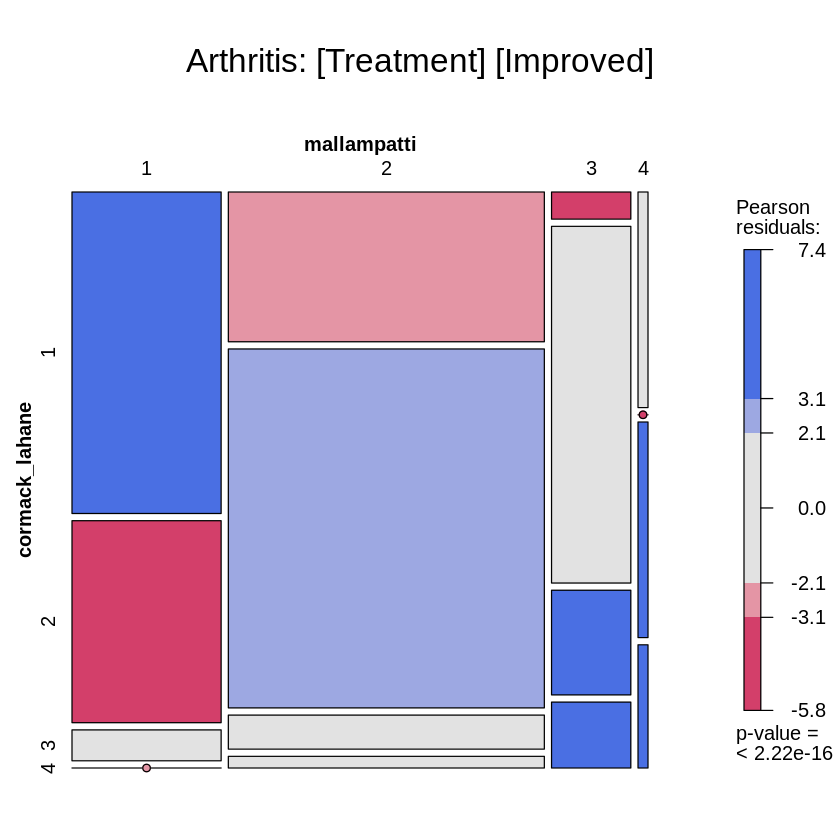

In [26]:
# prompt:  Write code to create mosaic plot to show strength of relationship between sex and cormack_lahane. Color it and also show legend with p value

# Load necessary library
library(vcd)

art <- xtabs(~mallampatti + cormack_lahane, data = df)


mosaic(art, gp = shading_max,
            split_vertical = TRUE,
             main="Arthritis: [Treatment] [Improved]")






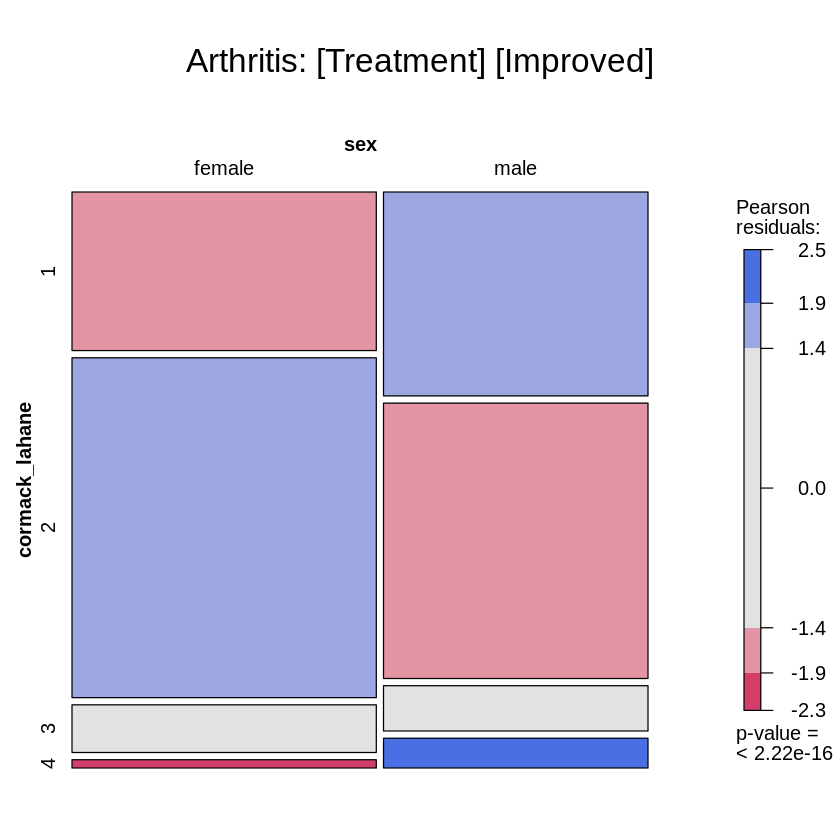

In [28]:
# prompt:  Write code to create mosaic plot to show strength of relationship between sex and cormack_lahane. Color it and also show legend with p value

# Load necessary library
library(vcd)

art <- xtabs(~sex + cormack_lahane, data = df)


mosaic(art, gp = shading_max,
            split_vertical = TRUE,
             main="Arthritis: [Treatment] [Improved]")






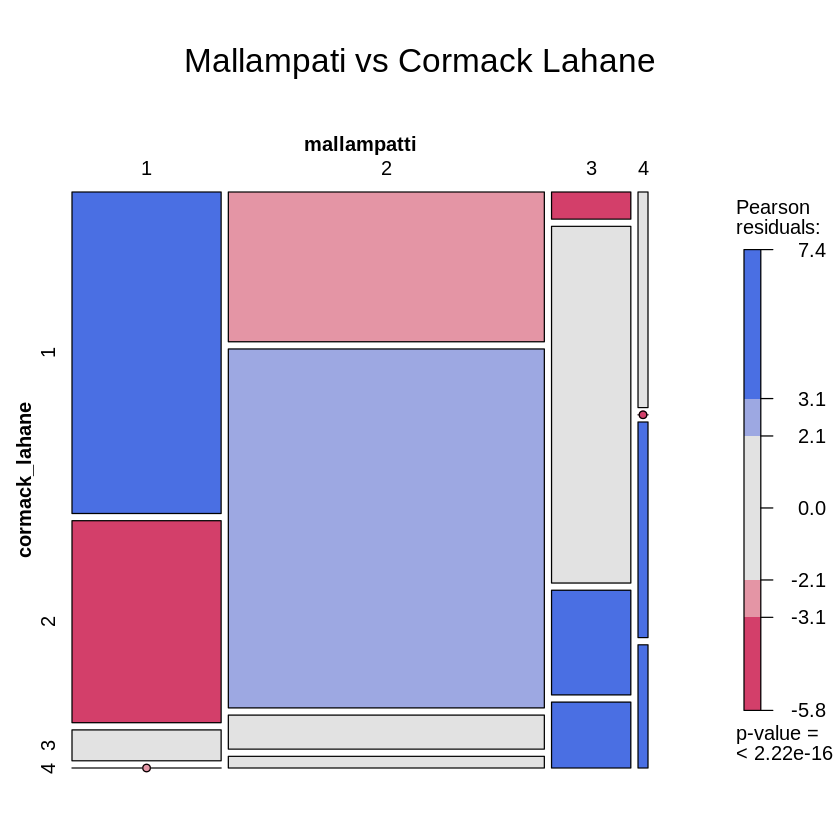

ERROR: [1m[33mError[39m in `gtable_add_grob()`:[22m
[33m![39m `grobs` must be a single grob or a list of grobs, not a list.


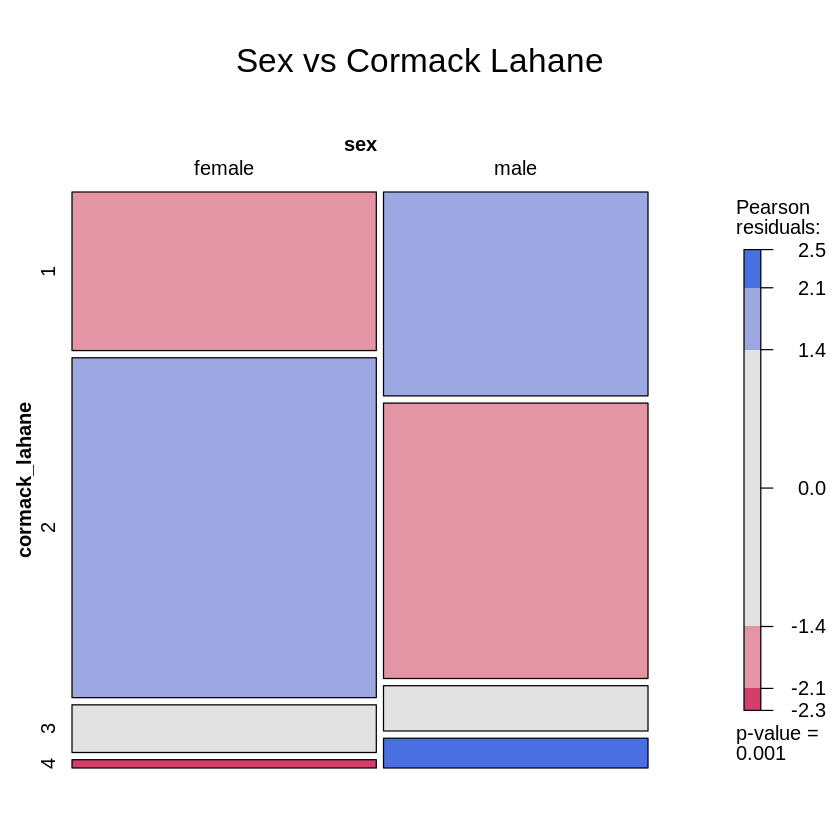

In [34]:
# prompt: Draw the above two mosaic plots side-by-side in one row

# Load necessary library
library(vcd)
library(gridExtra)


art1 <- xtabs(~mallampatti + cormack_lahane, data = df)
plot1 <- mosaic(art1, gp = shading_max, split_vertical = TRUE, main="Mallampati vs Cormack Lahane")


art2 <- xtabs(~sex + cormack_lahane, data = df)
plot2 <- mosaic(art2, gp = shading_max, split_vertical = TRUE, main="Sex vs Cormack Lahane")

grid.arrange(plot1, plot2, ncol=2)

Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”


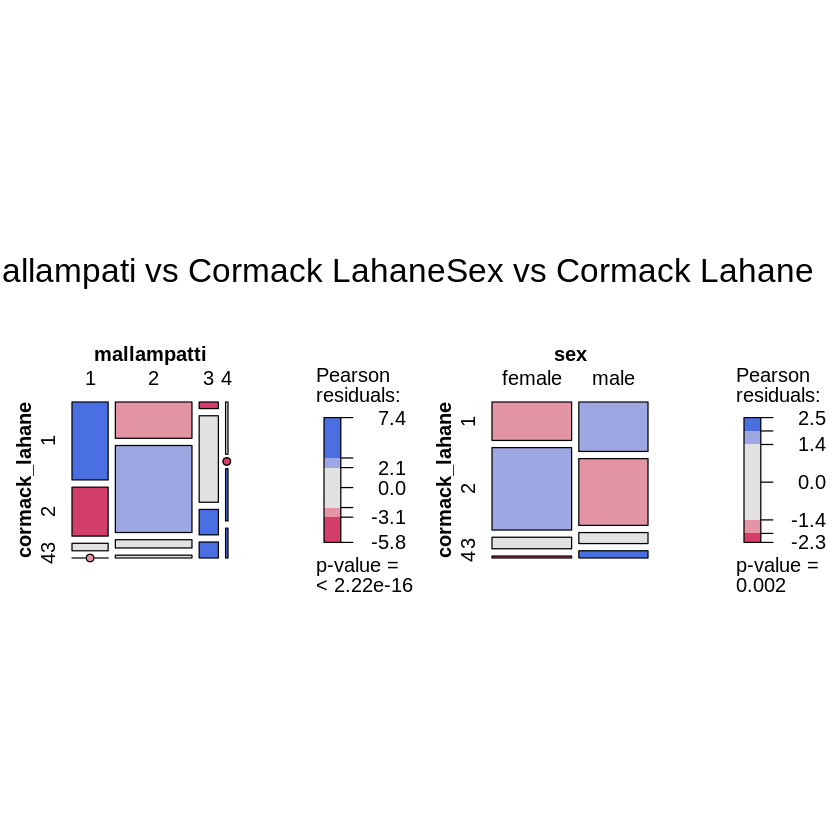

In [37]:
library(vcd)
library(gridExtra)
library(grid)

art1 <- xtabs(~mallampatti + cormack_lahane, data = df)
# Capture plot1 as a grob object
plot1 <- grid.grabExpr(mosaic(art1, gp = shading_max, split_vertical = TRUE, main="Mallampati vs Cormack Lahane"))


art2 <- xtabs(~sex + cormack_lahane, data = df)
# Capture plot2 as a grob object
plot2 <- grid.grabExpr(mosaic(art2, gp = shading_max, split_vertical = TRUE, main="Sex vs Cormack Lahane"))

a=grid.arrange(plot1, plot2, ncol=2)